In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

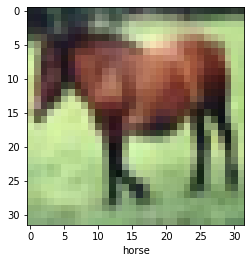

In [7]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4902 - accuracy: 0.4577 - val_loss: 1.2625 - val_accuracy: 0.5455
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1305 - accuracy: 0.6020 - val_loss: 1.0492 - val_accuracy: 0.6347
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9782 - accuracy: 0.6557 - val_loss: 0.9750 - val_accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8795 - accuracy: 0.6908 - val_loss: 0.9114 - val_accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8163 - accuracy: 0.7131 - val_loss: 0.9072 - val_accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7588 - accuracy: 0.7338 - val_loss: 0.8587 - val_accuracy: 0.7034
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7073 - accuracy: 0.7515 - val_loss: 0.8724 - val_accuracy:

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(test_accuracy)

313/313 - 1s - loss: 0.9076 - accuracy: 0.7009
0.7009000182151794


In [15]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation

When there is not enough data to get a good idea of what is in the dataset, we can change the way the data is shown to add more data to the entire dataset.

In this case we can add a bunch of transformations to images and increase the size of the dataset and the amount of angles the model sees the data from.

We can:

* rotate the image
* flip the image
* zoom into the image
* shear the image

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)

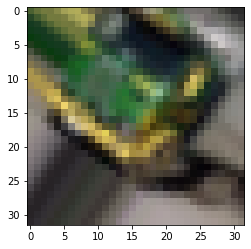

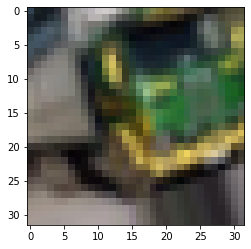

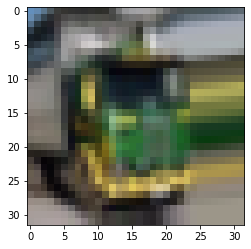

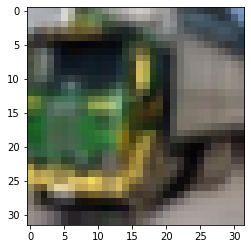

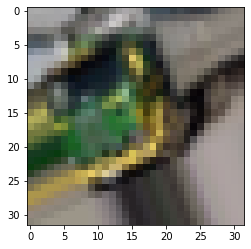

In [18]:
test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break

plt.show()

# Pretrained models

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [20]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

Shuffling and writing examples to /home/chaitanyae/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteXN19R5/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /home/chaitanyae/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


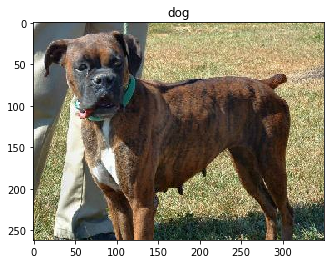

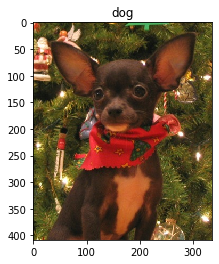

In [21]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [22]:
IMG_SIZE = 160 # all images are different sizes to reshape them

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [23]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

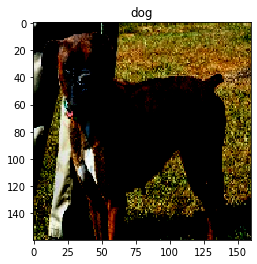

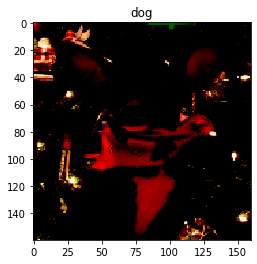

In [25]:
for image, label in train.take(2):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(get_label_name(label))

In [32]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [26]:
for img, label in raw_train.take(2):
    print("Original shape:", img.shape)
for img, label in train.take(2):
    print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


In [29]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [30]:
base_model.summary()

_relu[0][0]        
__________________________________________________________________________________________________
block_6_depthwise (DepthwiseCon (None, 10, 10, 192)  1728        block_6_pad[0][0]                
__________________________________________________________________________________________________
block_6_depthwise_BN (BatchNorm (None, 10, 10, 192)  768         block_6_depthwise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 10, 10, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 10, 10, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 10, 10, 64)   256         block_6_project[0][0]   

In [34]:
for image, _ in train_batches.take(1):
    pass

feature_branch = base_model(image)
print(feature_branch.shape)

(32, 5, 5, 1280)


In [35]:
base_model.trainable = False

In [36]:
base_model.summary()

xpand_relu[0][0]        
__________________________________________________________________________________________________
block_6_depthwise (DepthwiseCon (None, 10, 10, 192)  1728        block_6_pad[0][0]                
__________________________________________________________________________________________________
block_6_depthwise_BN (BatchNorm (None, 10, 10, 192)  768         block_6_depthwise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 10, 10, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 10, 10, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 10, 10, 64)   256         block_6_project[0][

In [37]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [38]:
prediction_layer = keras.layers.Dense(1)

In [39]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

20/20 [==============================] - 1s 28ms/step - loss: 0.5745 - accuracy: 0.7250


In [43]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/3
582/582 [==============================] - 34s 58ms/step - loss: 0.1842 - accuracy: 0.9291 - val_loss: 0.0885 - val_accuracy: 0.9708
Epoch 2/3
582/582 [==============================] - 33s 57ms/step - loss: 0.0724 - accuracy: 0.9746 - val_loss: 0.0661 - val_accuracy: 0.9742
Epoch 3/3
582/582 [==============================] - 33s 56ms/step - loss: 0.0587 - accuracy: 0.9793 - val_loss: 0.0579 - val_accuracy: 0.9785


In [44]:
acc = history.history['accuracy']
print(acc)

[0.9290704131126404, 0.9745835661888123, 0.9793121814727783]


In [45]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')